# H&M Fashion Recommender

## Libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

## Business Understanding
H&M Group is a clothing business with 53 online markets and approximately 4,850 stores. They are concerned that customers might not quickly find what interests them or what they are looking for, and ultimately might not make a purchase. They want to enhance the shopping experience and help customers make the right choices. The company thinks there is an opportunity to reduce transportation emissions if they reduce customer returns. H&M want product recommendations based on data from previous transactions, as well as from customer and product meta data.

For each customer_id observed in the training data, they want to be able to predict up to 12 labels for the article_id, which is the predicted items a customer will buy in the next 7-day period after the training time period.

H&M will make purchase predictions for all customer_id values provided, regardless of whether these customers made purchases in the training data, customers who did not make any purchase during test period are excluded from the scoring. Kaggle evaluation is based on Mean Average Precision @ 12 (MAP@12). There is no penalty for using the full 12 predictions for a customer that ordered fewer than 12 items. They encourage to make 12 predictions for each customer.


## Data Understanding

### Data Scope

Provided data is 34.56GB in total, it consists of csv files for artcles, customers, sample submissions and past transactions for training. Also included is an image folder containing images for each product sold. Since the image file size is large only the csv files will be considered. The transactions_train.csv is 3.4gb so only a sample of this file will be used for exploration and building a model.

### Articles

Load the first 10 rows from the articles.csv file and have panda display them. I'm looking to see what columns I can use and what preprocessing work might be needed.

In [2]:
df = pd.read_csv('data/articles.csv', nrows=10)

In [3]:
for col_id, col_name in enumerate(df.columns):
    print(str(col_id) + ". " + col_name)

0. article_id
1. product_code
2. prod_name
3. product_type_no
4. product_type_name
5. product_group_name
6. graphical_appearance_no
7. graphical_appearance_name
8. colour_group_code
9. colour_group_name
10. perceived_colour_value_id
11. perceived_colour_value_name
12. perceived_colour_master_id
13. perceived_colour_master_name
14. department_no
15. department_name
16. index_code
17. index_name
18. index_group_no
19. index_group_name
20. section_no
21. section_name
22. garment_group_no
23. garment_group_name
24. detail_desc


Articles are products that can be sold to customers, I can see that there text and encoded version for each column are available. Later for modelling I'll ignore the string columns which leaves the following to work with:

0. article_id
1. product_code
3. product_type_no
6. graphical_appearance_no
8. colour_group_code
10. perceived_colour_value_id
12. perceived_colour_master_id
14. department_no
16. index_code
18. index_group_no
20. section_no
22. garment_group_no

In [4]:
df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


I look at the first two rows to get an idea of what information is available to me and what values look like

In [5]:
df.iloc[0]

article_id                                                    108775015
product_code                                                     108775
prod_name                                                     Strap top
product_type_no                                                     253
product_type_name                                              Vest top
product_group_name                                   Garment Upper body
graphical_appearance_no                                         1010016
graphical_appearance_name                                         Solid
colour_group_code                                                     9
colour_group_name                                                 Black
perceived_colour_value_id                                             4
perceived_colour_value_name                                        Dark
perceived_colour_master_id                                            5
perceived_colour_master_name                                    

In [6]:
df.iloc[1]

article_id                                                    108775044
product_code                                                     108775
prod_name                                                     Strap top
product_type_no                                                     253
product_type_name                                              Vest top
product_group_name                                   Garment Upper body
graphical_appearance_no                                         1010016
graphical_appearance_name                                         Solid
colour_group_code                                                    10
colour_group_name                                                 White
perceived_colour_value_id                                             3
perceived_colour_value_name                                       Light
perceived_colour_master_id                                            9
perceived_colour_master_name                                    

Products come in different colours, pattern which means that the article id can be different for the same product indicating that a colour or pattern is different. Sizes are missing which may be an issue later as from my understanding of this business customers needs to be able to buy clothes that fit them and if they don't have them in their size or purchase the wrong size it may lead to no sale or a return.  

#### Article Data Visualisation

##### Product Distribution

C:\Users\newlo\AppData\Local\Temp\ipykernel_4784\1898657908.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_type_counts.values, y=product_type_counts.index, palette="viridis")


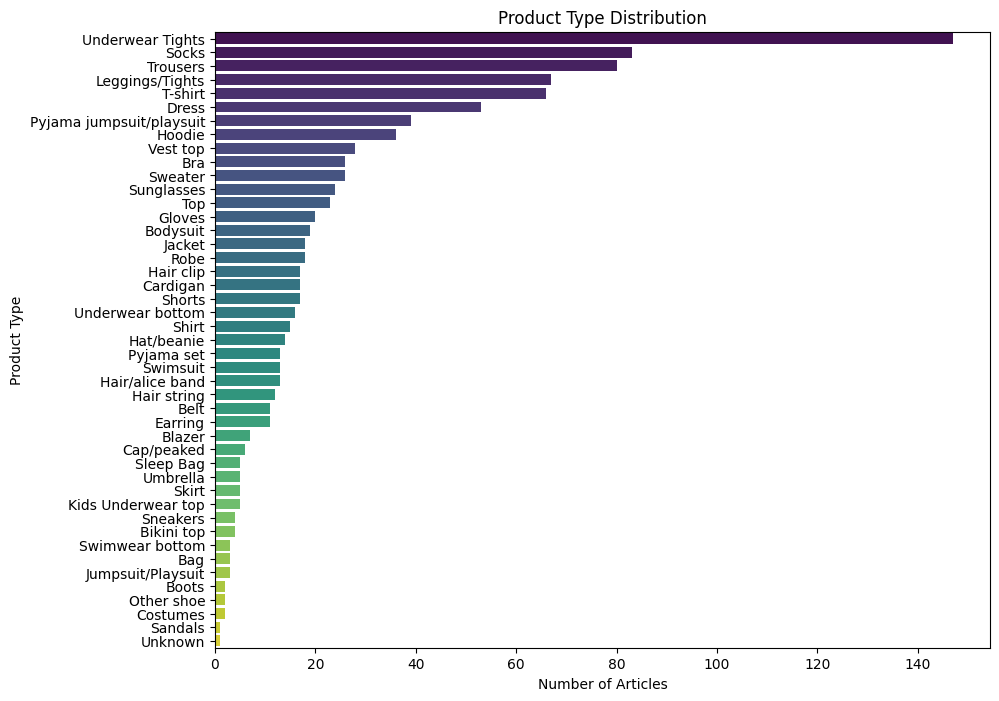

In [7]:
#load a 1000 rows into memory
df = pd.read_csv('data/articles.csv', nrows=1000, usecols=['product_type_name'])

# Count the number of articles per product type
product_type_counts = df['product_type_name'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 8))
sns.barplot(x=product_type_counts.values, y=product_type_counts.index, palette="viridis")
plt.title('Product Type Distribution')
plt.xlabel('Number of Articles')
plt.ylabel('Product Type')
plt.show()

There are more than 60 different types of Tights, Socks, Trousers, Leggings, T-shirts and dresses with everything else less than 60, these appear to be the most products available for sale.

C:\Users\newlo\AppData\Local\Temp\ipykernel_4784\2200361665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=garment_group_counts.values, y=garment_group_counts.index, palette="coolwarm")


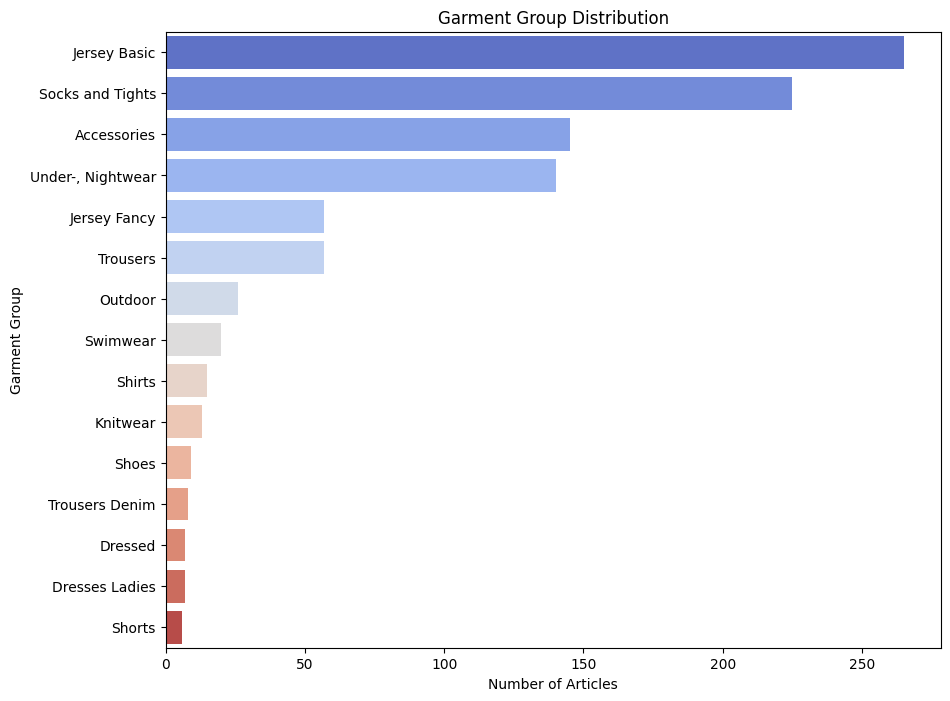

In [8]:
#load a 1000 rows into memory
df = pd.read_csv('data/articles.csv', nrows=1000, usecols=['garment_group_name'])

# Count the number of articles per garment group
garment_group_counts = df['garment_group_name'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 8))
sns.barplot(x=garment_group_counts.values, y=garment_group_counts.index, palette="coolwarm")
plt.title('Garment Group Distribution')
plt.xlabel('Number of Articles')
plt.ylabel('Garment Group')
plt.show()

Jersey knitted fabric are the most available products for purchase, socks amd tights come in second. Both have over 200 different articles.

##### Color Analysis

C:\Users\newlo\AppData\Local\Temp\ipykernel_4784\3801170160.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_group_counts.values, y=color_group_counts.index, palette="Spectral")


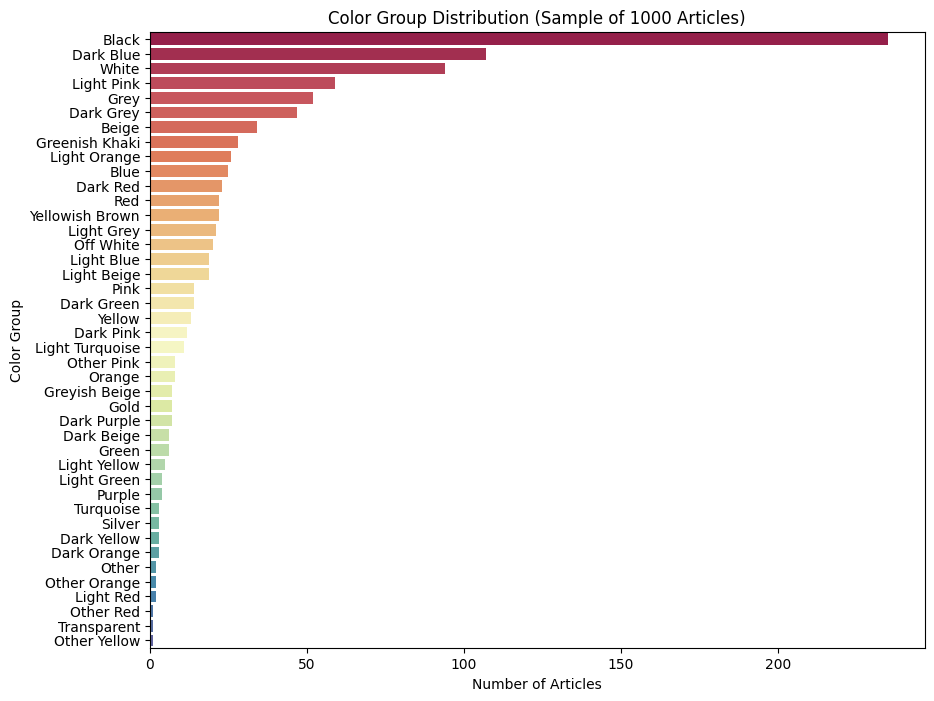

In [9]:
#load a 1000 rows into memory
df = pd.read_csv('data/articles.csv', nrows=1000, usecols=['colour_group_name'])

# Count the number of articles per color group
color_group_counts = df['colour_group_name'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 8))
sns.barplot(x=color_group_counts.values, y=color_group_counts.index, palette="Spectral")
plt.title('Color Group Distribution (Sample of 1000 Articles)')
plt.xlabel('Number of Articles')
plt.ylabel('Color Group')
plt.show()

More than 90 different articles come in black, dark blue and white 

C:\Users\newlo\AppData\Local\Temp\ipykernel_4784\73891446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perceived_color_value_counts.values, y=perceived_color_value_counts.index, palette="coolwarm")


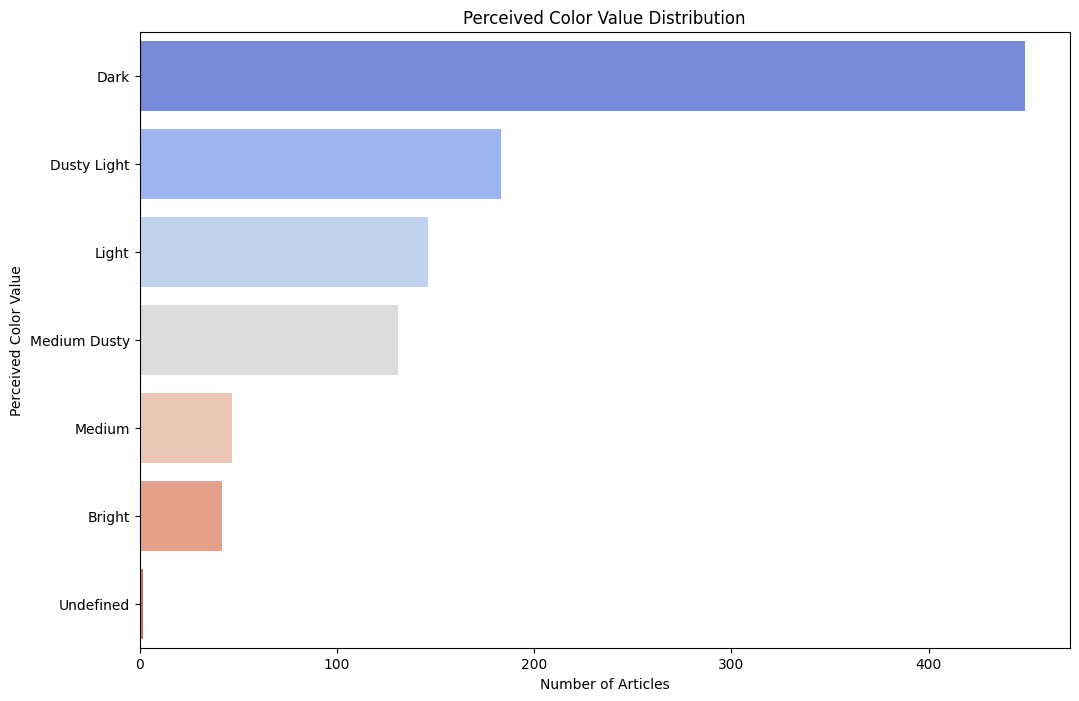

In [10]:
#load a 1000 rows into memory
df = pd.read_csv('data/articles.csv', nrows=1000, usecols=['perceived_colour_value_name'])

# Count the number of articles per color group
perceived_color_value_counts  = df['perceived_colour_value_name'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=perceived_color_value_counts.values, y=perceived_color_value_counts.index, palette="coolwarm")
plt.title('Perceived Color Value Distribution')
plt.xlabel('Number of Articles')
plt.ylabel('Perceived Color Value')
plt.show()

C:\Users\newlo\AppData\Local\Temp\ipykernel_4784\2199593413.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perceived_color_master_counts.values, y=perceived_color_master_counts.index, palette="muted")


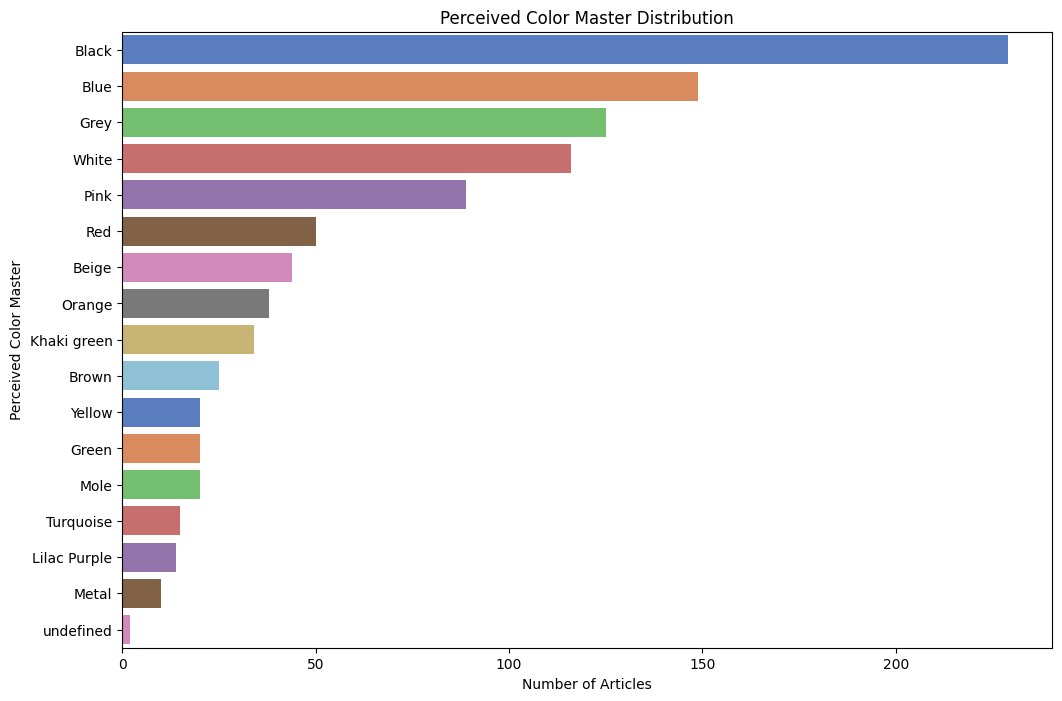

In [11]:
#load a 1000 rows into memory
df = pd.read_csv('data/articles.csv', nrows=1000, usecols=['perceived_colour_master_name'])

# Count the number of articles per color group
perceived_color_master_counts   = df['perceived_colour_master_name'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=perceived_color_master_counts.values, y=perceived_color_master_counts.index, palette="muted")
plt.title('Perceived Color Master Distribution')
plt.xlabel('Number of Articles')
plt.ylabel('Perceived Color Master')
plt.show()

##### Categorical Relationships

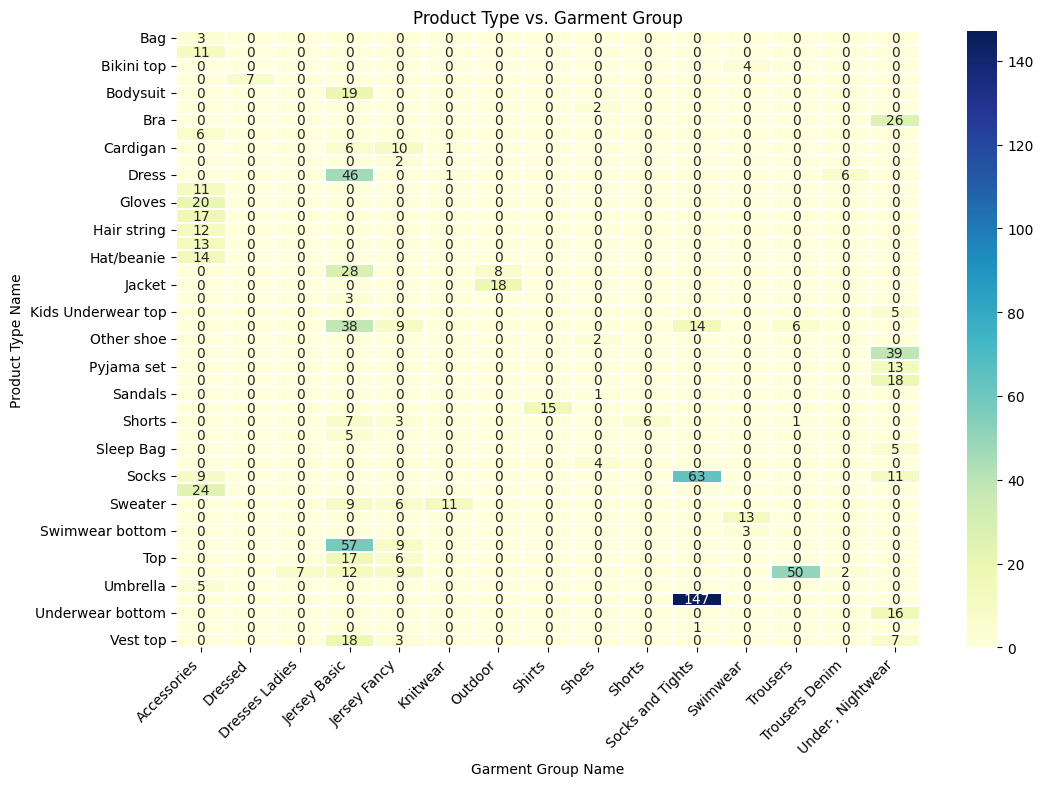

In [12]:
#load a 1000 rows into memory
df = pd.read_csv('data/articles.csv', nrows=1000, usecols=['product_type_name', 'garment_group_name'])

# Create a contingency table
contingency_table = pd.crosstab(df['product_type_name'], df['garment_group_name'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.2)
plt.title('Product Type vs. Garment Group')
plt.xlabel('Garment Group Name')
plt.ylabel('Product Type Name')
plt.xticks(rotation=45, ha="right")  # Improve readability of x labels
plt.yticks(rotation=0)  # Ensure y labels are horizontal for readability
plt.show()

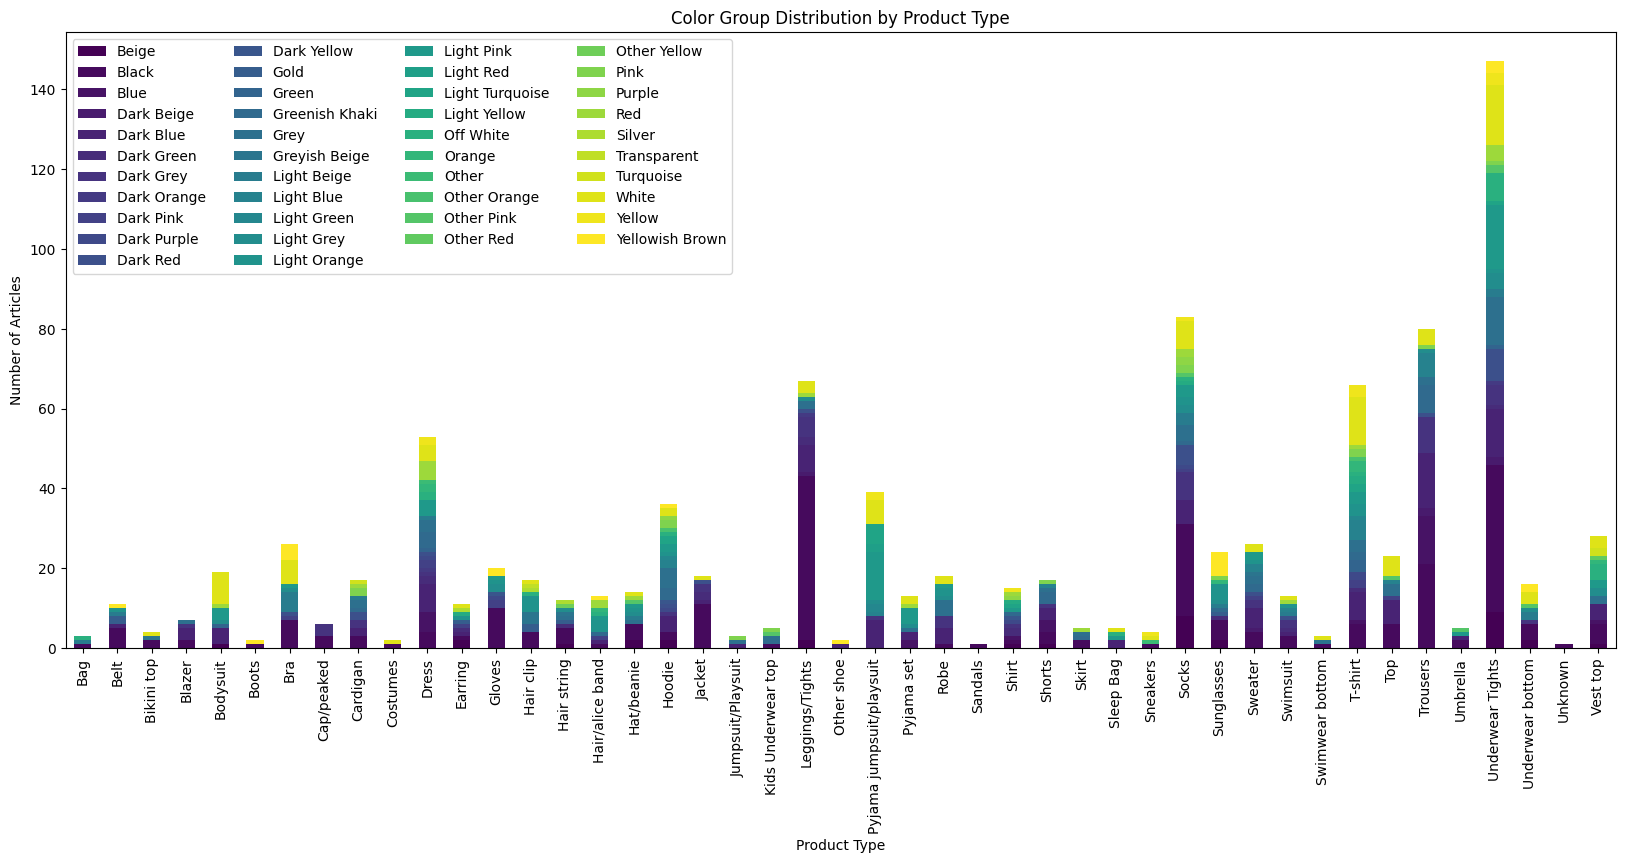

In [13]:
#load a 1000 rows into memory
df = pd.read_csv('data/articles.csv', nrows=1000, usecols=['product_type_name', 'colour_group_name'])

# Aggregate the data
agg_data = df.groupby(['product_type_name', 'colour_group_name']).size().unstack(fill_value=0)

# Plot
agg_data.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='viridis')
plt.title('Color Group Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.legend(ncol=4)
plt.show()

##### Index and Section Analysis

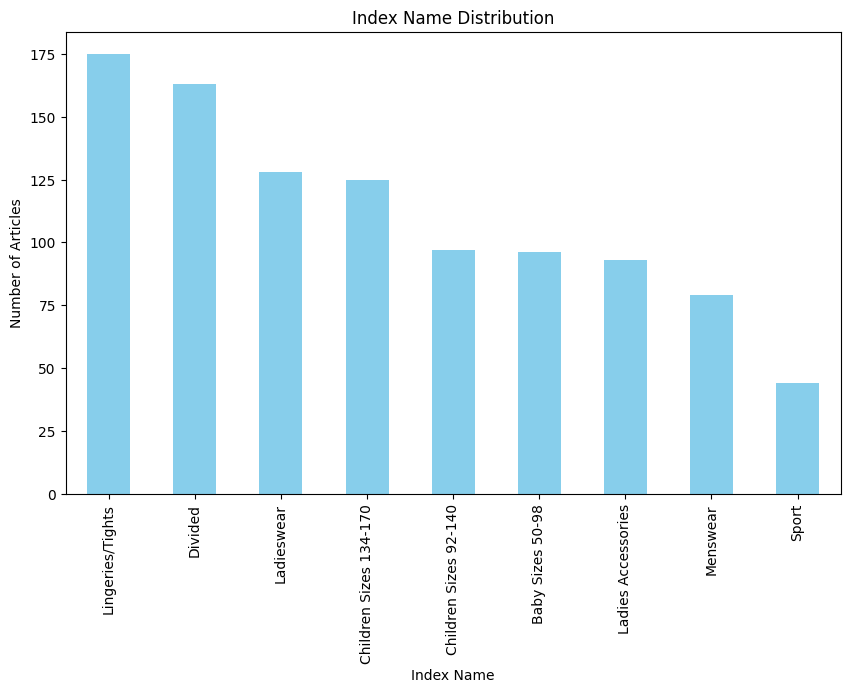

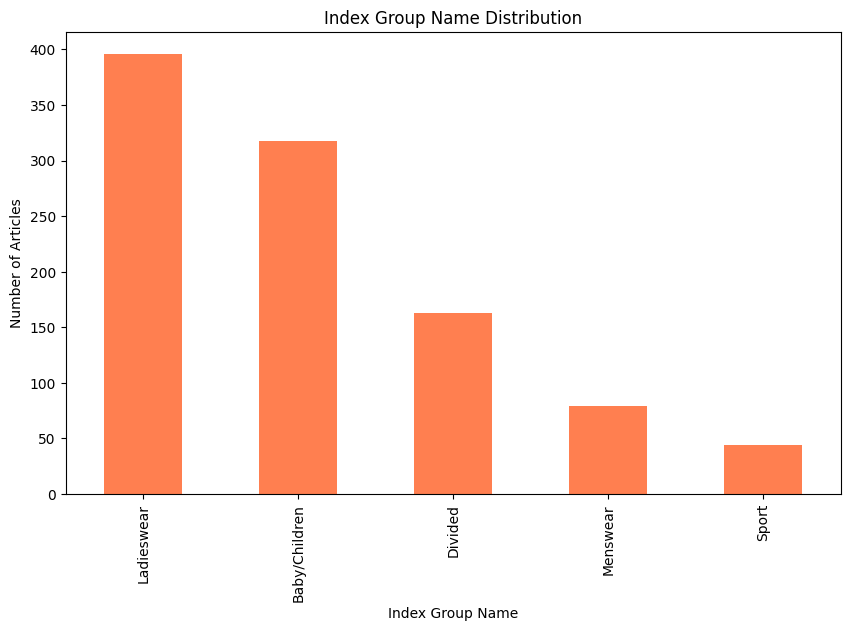

In [14]:
#load a 1000 rows into memory
df = pd.read_csv('data/articles.csv', nrows=1000, usecols=['index_name', 'index_group_name'])

# Count the occurrences of each index name
index_name_counts = df['index_name'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
index_name_counts.plot(kind='bar', color='skyblue')
plt.title('Index Name Distribution')
plt.xlabel('Index Name')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.show()

# Count the occurrences of each index group name
index_group_name_counts = df['index_group_name'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
index_group_name_counts.plot(kind='bar', color='coral')
plt.title('Index Group Name Distribution')
plt.xlabel('Index Group Name')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.show()

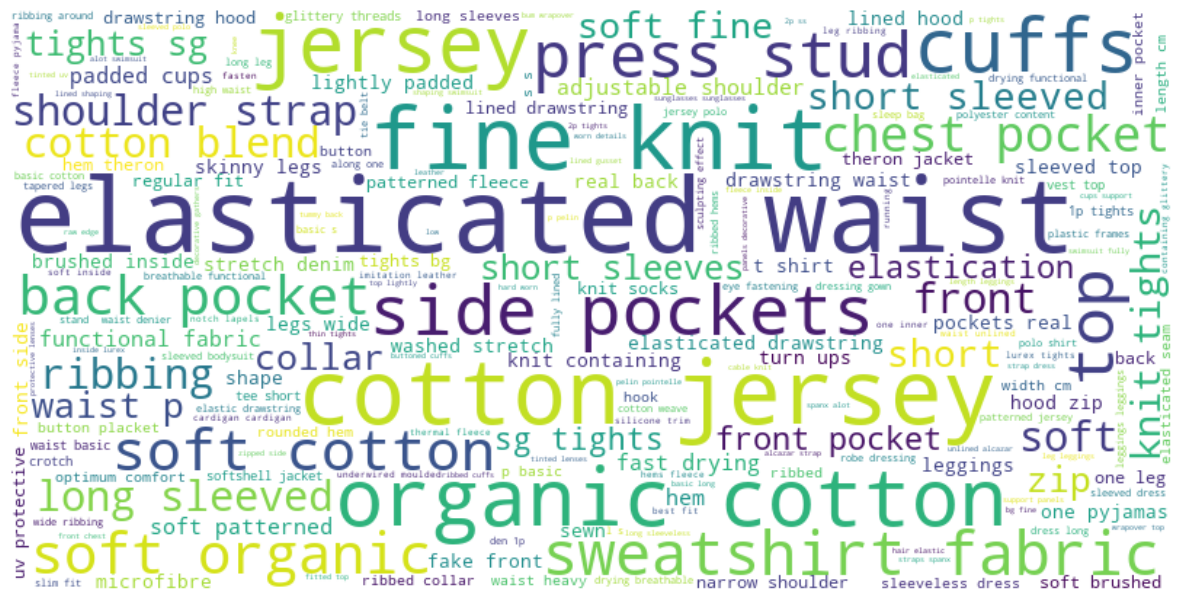

In [15]:
#load a 1000 rows into memory
df = pd.read_csv('data/articles.csv', nrows=1000, usecols=['prod_name', 'detail_desc'])
text_data = ' '.join(df['prod_name'].fillna('') + ' ' + df['detail_desc'].fillna('')).lower()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Don't show axes to keep it clean
plt.show()

### Customers

In [16]:
df = pd.read_csv('data/customers.csv', nrows=10)

In [17]:
for col_id, col_name in enumerate(df.columns):
    print(str(col_id) + ". " + col_name)

0. customer_id
1. FN
2. Active
3. club_member_status
4. fashion_news_frequency
5. age
6. postal_code


In [18]:
df.iloc[0]

customer_id               00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
FN                                                                      NaN
Active                                                                  NaN
club_member_status                                                   ACTIVE
fashion_news_frequency                                                 NONE
age                                                                    49.0
postal_code               52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
Name: 0, dtype: object

In [19]:
df.iloc[1]

customer_id               0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...
FN                                                                      NaN
Active                                                                  NaN
club_member_status                                                   ACTIVE
fashion_news_frequency                                                 NONE
age                                                                    25.0
postal_code               2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
Name: 1, dtype: object

### Transactions

In [20]:
df = pd.read_csv('data/transactions_train.csv', nrows=10)

In [21]:
for col_id, col_name in enumerate(df.columns):
    print(str(col_id) + ". " + col_name)

0. t_dat
1. customer_id
2. article_id
3. price
4. sales_channel_id


In [22]:
df.iloc[0]

t_dat                                                      2018-09-20
customer_id         000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
article_id                                                  663713001
price                                                        0.050831
sales_channel_id                                                    2
Name: 0, dtype: object

In [23]:
df.iloc[1]

t_dat                                                      2018-09-20
customer_id         000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
article_id                                                  541518023
price                                                        0.030492
sales_channel_id                                                    2
Name: 1, dtype: object

### Sample Submission

In [24]:
df = pd.read_csv('data/sample_submission.csv', nrows=10)

In [25]:
for col_id, col_name in enumerate(df.columns):
    print(str(col_id) + ". " + col_name)

0. customer_id
1. prediction


In [26]:
df.iloc[0]

customer_id    00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
prediction     0706016001 0706016002 0372860001 0610776002 07...
Name: 0, dtype: object

### Merged training set

In [27]:
articles_df = pd.read_csv('data/articles.csv', usecols=['article_id', 
                                                   'product_code', 
                                                   'product_type_no', 
                                                   'graphical_appearance_no',
                                                   'colour_group_code',
                                                   'perceived_colour_value_id',
                                                   'perceived_colour_master_id',
                                                   'department_no',
                                                   'index_code',
                                                   'index_group_no',
                                                   'section_no',
                                                   'garment_group_no'])
customers_df = pd.read_csv('data/customers.csv', usecols=['customer_id', 
                                                     'FN', 
                                                     'Active',
                                                     'club_member_status',
                                                     'fashion_news_frequency',
                                                     'age',
                                                     'postal_code'])
df = pd.read_csv('data/transactions_train.csv', nrows=1000)


In [28]:
#merge customer
transactions_customers_df = pd.merge(df, customers_df, on='customer_id', how='left')
#merge articles
transactions_df  = pd.merge(transactions_customers_df, articles_df, on='article_id', how='left')

In [29]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,garment_group_no
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,ACTIVE,NONE,24.0,...,283,1010016,9,4,5,1338,B,1,61,1017
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,ACTIVE,NONE,24.0,...,306,1010016,51,1,4,1334,B,1,61,1017
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,ACTIVE,Regularly,32.0,...,252,1010010,52,2,4,5963,D,2,58,1003
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,...,252,1010010,52,7,4,3090,A,1,15,1023
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,...,252,1010010,93,4,19,3090,A,1,15,1023


Since we have a date column and our task is to predict articles for each customer in the next 7 days we can create new features from the date column.

In [30]:
def get_season(month):
    if month in [3, 4, 5]:
        return 0
    elif month in [6, 7, 8]:
        return 1
    elif month in [9, 10, 11]:
        return 2
    else:
        return 3

#Year, Month, Day
transactions_df['year'] = pd.to_datetime(transactions_df['t_dat']).dt.year
transactions_df['month'] = pd.to_datetime(transactions_df['t_dat']).dt.month
transactions_df['day'] = pd.to_datetime(transactions_df['t_dat']).dt.day

#Weekday
transactions_df['weekday'] = pd.to_datetime(transactions_df['t_dat']).dt.weekday  # Monday=0, Sunday=6

#Week of Year
transactions_df['week_of_year'] = pd.to_datetime(transactions_df['t_dat']).dt.isocalendar().week

#Quarter
transactions_df['quarter'] = pd.to_datetime(transactions_df['t_dat']).dt.quarter

# Is Weekend?
transactions_df['is_weekend'] = pd.to_datetime(transactions_df['t_dat']).dt.weekday.isin([5, 6]).astype(int)  # 1 for Saturday and Sunday, 0 otherwise

#End of Month
transactions_df['is_month_end'] = pd.to_datetime(transactions_df['t_dat']).dt.is_month_end.astype(int)

#Season
transactions_df['season'] = pd.to_datetime(transactions_df['t_dat']).dt.month.apply(get_season) # spring=0, summer=1, fall=2, winter=3

In [31]:
#Days Since customer last purchase
#sort by customer and by date
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])
transactions_df.sort_values(by=['customer_id', 't_dat'], ascending=[True, True], inplace=True)

#group by customer and calc difference in transaction date
transactions_df['days_since_last_purchase'] = transactions_df.groupby('customer_id')['t_dat'].diff().dt.days

#fix nan for first purchase
transactions_df['days_since_last_purchase'] = transactions_df['days_since_last_purchase'].fillna(0)

In [32]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,year,month,day,weekday,week_of_year,quarter,is_weekend,is_month_end,season,days_since_last_purchase
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,ACTIVE,NONE,24.0,...,2018,9,20,3,38,3,0,0,2,0.0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,ACTIVE,NONE,24.0,...,2018,9,20,3,38,3,0,0,2,0.0
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,ACTIVE,Regularly,32.0,...,2018,9,20,3,38,3,0,0,2,0.0
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,...,2018,9,20,3,38,3,0,0,2,0.0
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,...,2018,9,20,3,38,3,0,0,2,0.0


In [33]:
for col_id, col_name in enumerate(transactions_df.columns):
    print(str(col_id) + ". " + col_name)

0. t_dat
1. customer_id
2. article_id
3. price
4. sales_channel_id
5. FN
6. Active
7. club_member_status
8. fashion_news_frequency
9. age
10. postal_code
11. product_code
12. product_type_no
13. graphical_appearance_no
14. colour_group_code
15. perceived_colour_value_id
16. perceived_colour_master_id
17. department_no
18. index_code
19. index_group_no
20. section_no
21. garment_group_no
22. year
23. month
24. day
25. weekday
26. week_of_year
27. quarter
28. is_weekend
29. is_month_end
30. season
31. days_since_last_purchase


In [34]:
# Specify the new column order
column_order = [
    'customer_id',  # Move customer_id to the first position
    # Include all other columns except customer_id and article_id
    'price', 'sales_channel_id', 'FN', 'Active',
    'club_member_status', 'fashion_news_frequency', 'age', 'postal_code',
    'product_code', 'product_type_no', 'graphical_appearance_no',
    'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id',
    'department_no', 'index_code', 'index_group_no', 'section_no',
    'garment_group_no', 'year', 'month', 'day', 'weekday',
    'week_of_year', 'quarter', 'is_weekend', 'is_month_end', 'season', 
    'days_since_last_purchase',
    'article_id'  # Move article_id to the last position
]

# Reorder the DataFrame
transactions_df = transactions_df[column_order]

In [35]:
for col_id, col_name in enumerate(transactions_df.columns):
    print(str(col_id) + ". " + col_name)

0. customer_id
1. price
2. sales_channel_id
3. FN
4. Active
5. club_member_status
6. fashion_news_frequency
7. age
8. postal_code
9. product_code
10. product_type_no
11. graphical_appearance_no
12. colour_group_code
13. perceived_colour_value_id
14. perceived_colour_master_id
15. department_no
16. index_code
17. index_group_no
18. section_no
19. garment_group_no
20. year
21. month
22. day
23. weekday
24. week_of_year
25. quarter
26. is_weekend
27. is_month_end
28. season
29. days_since_last_purchase
30. article_id


I now have a target variable article_id and and features from customers and their transactions to try predict it. The next stage in data understanding is to try narrow these features down to the ones that are most important to predicting the article_id and remove the rest. This will help against the curse of dimensionality. First I need to remove any features no longer needed, such as t_dat, then ensure that the data is cleaned and standardised as many tools such as PCA are affected by scale.

### Data Cleaning

In [36]:
print(transactions_df.dtypes)

customer_id                    object
price                         float64
sales_channel_id                int64
FN                            float64
Active                        float64
club_member_status             object
fashion_news_frequency         object
age                           float64
postal_code                    object
product_code                    int64
product_type_no                 int64
graphical_appearance_no         int64
colour_group_code               int64
perceived_colour_value_id       int64
perceived_colour_master_id      int64
department_no                   int64
index_code                     object
index_group_no                  int64
section_no                      int64
garment_group_no                int64
year                            int32
month                           int32
day                             int32
weekday                         int32
week_of_year                   UInt32
quarter                         int32
is_weekend  

In [38]:
transactions_df.iloc[0]

customer_id                   000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
price                                                                  0.050831
sales_channel_id                                                              2
FN                                                                          NaN
Active                                                                      NaN
club_member_status                                                       ACTIVE
fashion_news_frequency                                                     NONE
age                                                                        24.0
postal_code                   64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
product_code                                                             663713
product_type_no                                                             283
graphical_appearance_no                                                 1010016
colour_group_code                       

In [39]:
#le = LabelEncoder()
for cat_var in ['FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'index_code']:
    print(transactions_df[cat_var].unique())
#    transactions_df[cat_var] = le.fit_transform(transactions_df[cat_var])

[nan  1.]
[nan  1.]
['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']
['NONE' 'Regularly' nan]
['B' 'D' 'A' 'C' 'F' 'H' 'G' 'J' 'S' 'I']


'FN' and 'Active' appear to be boolean so I assume nan is actually 0. 'club_member_status' and 'fashion_news_frequency' is harder to tell, I will remove these nan rows instead.

### Feature Importance